# Εργασία 1. Επιβλεπόμενη Μάθηση - Μέρος 2. K14: CS-GO dataset 
## Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα

| Team 10                              |          |
|--------------------------------------|----------|
| Ανδρεάς Χρυσοβαλάντης - Κωνσταντίνος | 03118102 |
| Μανίατης Ανδρέας                     | 03118070 |
| Παπανικολάου Ιωάννης                 | 03118064 |

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csgo-round-winner-classification/csgo_round_snapshots.csv


# Παρουσίαση του dataset
Το dataset αποτελείται από snapshots από περίπου 700 demo από παιχνίδια τουρνουά CSGO του 2019 και του 2020. Οι γύροι προθέρμανσης και οι επανεκκινήσεις έχουν φιλτραριστεί και για τους υπόλοιπους γύρους καταγράφεται ένα snapshot του γύρου κάθε 20 sec μέχρι να λήξει ο γύρος. Σε κάθε στιγμιότυπο υπάρχει ένα πλήθος απο χαρακτηριστικά σχετικά με την στιγμή που αυτό τραβήχτηκε, μεταξύ αυτών και το ποιός ήταν εν τέλει ο νικητής του αγώνα.
*Το πρόβλημα, λοιπόν, που περιγράφει αυτό το dataset είναι η πρόβλεψη της νικήτριας ομάδας T ή CT από το εκάστοτε snapshot. Επομένως είναι binary classification problem*

# Πλήθος δειγμάτων και χαρακτηριστικών
Από την περιγραφή στο kaggle βλέπουμε πώς στο dataset περιέχονται 122411 samples και 97 features. Παρακάτω βλέπουμε πώς αυτό επιβεβαιώνεται. Συγκεκριμένα το dataframe που υλοποιήσαμε περιέχει 122410 rows (samples) και 97 columns (features). Το 1 sample λιγότερο που έχουμε οφείλεται στο γεγονός πώς η πρώτη γραμμή του csv θεωρείται ως header στο dataframe. Από τα 97 columns 94 περιέχουν decimal δεδομένα, 2 string και 1 boolean.

In [3]:
# Create a data frame to better display the data
df = pd.read_csv('/kaggle/input/csgo-round-winner-classification/csgo_round_snapshots.csv', na_values = 'NA')
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [4]:
#show datatypes in our dataset
info_df=df.info()
info_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [5]:
#display only categorical values
cat_df = df.select_dtypes(include=['object','bool']).copy()
cat_df

,map,bomb_planted,round_winner
0,de_dust2,False,CT
1,de_dust2,False,CT
2,de_dust2,False,CT
3,de_dust2,False,CT
4,de_dust2,False,CT
...,...,...,...
122405,de_train,True,T
122406,de_train,False,T
122407,de_train,False,T
122408,de_train,False,T


# Missing values και Labels των κλάσεων
Παρατηρούμε πως το dataset δεν περιέχει αποσιάζουσες τιμές. Η κλάση των snapshot φαίνεται στην 97η στήλη με όνομα round_winner. Το label T υποδηλώνει πώς η Terrorist ομάδα νίκησε, ενώ το label CT πώς νκήτρια ήταν CT ομάδα. Παρακάτω δείξαμε πώς το 51% των δειγμάτων έχουν label T και 49% label CT. Επομένως, τα δεδομένα μας είναι ισορροπημένα.

In [6]:
# NaN τιμές 
data=np.array(df)
nan_values=np.sum(np.sum(df.isna()))

#Ισορροπία Δεδομένων
labels=data[:,96]
count_t=np.sum([labels=='T'])
count_ct=np.sum([labels=='CT'])
t_percent=100*count_t/(count_t+count_ct)
ct_percent=100*count_ct/(count_t+count_ct)

#print(data)
print("""
Number of NaN values in dataset: {}

    Dataset Balance
Labeled T: {}
Labeled TN:" {}
Percentage of T labels {:.1f}
Percentage of TN labels {:.1f}
""".format(nan_values, count_t, count_ct, t_percent, ct_percent))


Number of NaN values in dataset: 0

    Dataset Balance
Labeled T: 62406
Labeled TN:" 60004
Percentage of T labels 51.0
Percentage of TN labels 49.0



# Κωδικοποίηση των ετικετών των κατηγοριών
Για την κωδικοποίηση των labels, μπορούμε να χρησιμοποιήσουμε μια προσέγγιση παρόμοια με την αντιστοίχιση των διατεταγμένων χαρακτηριστικών που χρησιμοποιούμε παρακάτω. Οι ετικέτες κλάσης δεν είναι διατεταγμένες και άρα δεν έχει σημασία ο ακέραιος αριθμός που εκχωρούμε σε μια συγκεκριμένη ετικέτα, αρκεί να είναι μοναδικός. Έτσι, απαριθμούμε απλά τις ετικέτες κλάσης, ξεκινώντας από το 0.

In [7]:
df_onehot = df.copy()
# βρίσκουμε τις μοναδικές ετικέτες
class_mapping = {label:idx for idx,label in enumerate(np.unique(df_onehot['round_winner']))}
class_mapping
# και κάνουμε την μετατροπή
df_onehot['round_winner'] = df_onehot['round_winner'].map(class_mapping)  
df_onehot[['round_winner']]

,round_winner
0,0
1,0
2,0
3,0
4,0
...,...
122405,1
122406,1
122407,1
122408,1


# Χειρισμός κατηγορικών δεδομένων
Μετατρέπουμε κάθε κατηγορικό χαρακτηριστικό (που εντωπίσαμε παραπάνω) με m τιμές σε m binary χαρακτηριστικά από τα οποία μόνο ένα είναι ενεργό κάθε φορά. Παρατηρούμε πώς αυξήθηκαν οι κολώνες στα δεδομένα μας.

In [8]:
# Οι κολόνες map έχουν κατηγορικές μεταβλητές. 
# Με την "get_dummies" κάνουμε τη μετατροπή σε binary χαρακτηριστικά
df_onehot = pd.get_dummies(df_onehot, columns=['map', 'bomb_planted'], prefix = ['map', 'bomb_planted'])
df_onehot

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,bomb_planted_False,bomb_planted_True
0,175.00,0.0,0.0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,156.03,0.0,0.0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,96.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,76.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,174.97,1.0,0.0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,...,0,0,0,0,0,0,1,0,0,1
122406,174.93,11.0,15.0,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,...,0,0,0,0,0,0,1,0,1,0
122407,114.93,11.0,15.0,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,...,0,0,0,0,0,0,1,0,1,0
122408,94.93,11.0,15.0,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,...,0,0,0,0,0,0,1,0,1,0


In [9]:
# Μετατρέπουμε σε αριθμητικές τιμές (pd.to_numeric) και σε numpy array (.values)
np_df_onehot = df_onehot.apply(pd.to_numeric).values
np_df_onehot

array([[175.  ,   0.  ,   0.  , ...,   0.  ,   1.  ,   0.  ],
       [156.03,   0.  ,   0.  , ...,   0.  ,   1.  ,   0.  ],
       [ 96.03,   0.  ,   0.  , ...,   0.  ,   1.  ,   0.  ],
       ...,
       [114.93,  11.  ,  15.  , ...,   0.  ,   1.  ,   0.  ],
       [ 94.93,  11.  ,  15.  , ...,   0.  ,   1.  ,   0.  ],
       [ 74.93,  11.  ,  15.  , ...,   0.  ,   1.  ,   0.  ]])

# Split Dataset σε Train & Test sets
Κάνουμε split τα δεδομένα μας κατά 70% σε train και 30% σε test

In [10]:
from sklearn.model_selection import train_test_split

#Φτιάχνουμε τους πίνακες με τα features και τα labels
#label_names = ['CT', 'T']
labels = df_onehot['round_winner']
print(labels)

labels=np.array(labels)
print("""

{}

""".format(labels))

# τα ονόματα των χαρακτηριστικών (features)
feature_names = df_onehot.columns
print("feature_names shape: {}".format(feature_names.shape))

#βγάζουμε από τα features την στήλη round_winner που περιέχει τα labels
new_feature_names=feature_names.drop(['round_winner'])
print("feature_names.shape without the round_winner column {}".format(new_feature_names.shape))

features = df_onehot.drop(['round_winner'],axis=1)
print("""

Features array 
{}

""".format(features))

features=np.array(features)
print("""Numpy array of features 
{}
""".format(features))

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, Length: 122410, dtype: int64


[0 0 0 ... 1 1 1]


feature_names shape: (105,)
feature_names.shape without the round_winner column (104,)


Features array 
        time_left  ct_score  t_score  ct_health  t_health  ct_armor  t_armor  \
0          175.00       0.0      0.0      500.0     500.0       0.0      0.0   
1          156.03       0.0      0.0      500.0     500.0     400.0    300.0   
2           96.03       0.0      0.0      391.0     400.0     294.0    200.0   
3           76.03       0.0      0.0      391.0     400.0     294.0    200.0   
4          174.97       1.0      0.0      500.0     500.0     192.0      0.0   
...           ...       ...      ...        ...       ...       ...      ...   
122405      15.41      11.0     14.0      200.0     242.0     195.0    359.0   
122406     174.93      11.0     15.0      500.0     

In [11]:
# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.30, shuffle=True)

In [12]:
# Train set Balance
train_ct = np.sum([train_labels == 0])
train_t = np.sum([train_labels == 1])
t_percent=100*train_t/(train_t+train_ct) 
ct_percent=100*train_ct/(train_t+train_ct)

print("""
    Train set Balance
Labeled T: {}
Labeled TN:" {}
Percentage of T labels {:.1f}
Percentage of CT labels {:.1f}
""".format(train_t, train_ct, t_percent, ct_percent))

# Test set Balance
test_ct = np.sum([test_labels == 0])
test_t = np.sum([test_labels == 1])
t_percent=100*test_t/(test_t+test_ct) 
ct_percent=100*test_ct/(test_t+test_ct)

print("""
    Train set Balance
Labeled T: {}
Labeled TN:" {}
Percentage of T labels {:.1f}
Percentage of CT labels {:.1f}
""".format(test_t, test_ct, t_percent, ct_percent))


    Train set Balance
Labeled T: 43844
Labeled TN:" 41843
Percentage of T labels 51.2
Percentage of CT labels 48.8


    Train set Balance
Labeled T: 18562
Labeled TN:" 18161
Percentage of T labels 50.5
Percentage of CT labels 49.5



# Επίδοση Ταξινομητών out-of-the-box
Αρχικά θα εκπαιδεύσουμε τους ταξινομητές MLP και SVM με ένα απλό fit σε ολόκληρο το training set, με τις default τιμές τους και θα μετρήσουμε την επίδοσή τους σε ολόκληρο το test set.

**Dummy Classifier**

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import classification_report

dummy_clf = DummyClassifier()
dummy_clf.fit(train, train_labels)
dummy_preds = dummy_clf.predict(test)
print(f"Accuracy: {dummy_clf.score(test, test_labels):.4}")
print(f"F1_score: {f1_score(dummy_preds,test_labels,average='macro'):.4}")
print(classification_report(test_labels, dummy_preds))

Accuracy: 0.5084



F1_score: 0.337



              precision    recall  f1-score   support







           0       0.00      0.00      0.00     18053



           1       0.51      1.00      0.67     18670







    accuracy                           0.51     36723



   macro avg       0.25      0.50      0.34     36723



weighted avg       0.26      0.51      0.34     36723






/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



  _warn_prf(average, modifier, msg_start, len(result))



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



  _warn_prf(average, modifier, msg_start, len(result))



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



  _warn_prf(average, modifier, msg_start, len(result))


**MLP Classifier**

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import time

start_time=time.time()
clf_1 = MLPClassifier()
clf_1.fit(train, train_labels)
preds = clf_1.predict(test)
print("Συνολικός χρόνος fit και predict: {:.3f} seconds".format(time.time()-start_time))
print(classification_report(test_labels, preds))

Συνολικός χρόνος fit και predict: 33.860 seconds







              precision    recall  f1-score   support















           0       0.72      0.74      0.73     18128







           1       0.74      0.72      0.73     18595















    accuracy                           0.73     36723







   macro avg       0.73      0.73      0.73     36723







weighted avg       0.73      0.73      0.73     36723










**SVM**

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import time
start_time=time.time()
clf_2 = SVC()
clf_2.fit(train, train_labels)
preds = clf_2.predict(test)
print("Συνολικός χρόνος fit και predict: {:.3f} seconds".format(time.time()-start_time))
print(classification_report(test_labels, preds))

Συνολικός χρόνος fit και predict: 1275.027 seconds



              precision    recall  f1-score   support







           0       0.72      0.70      0.71     18093



           1       0.72      0.74      0.73     18630







    accuracy                           0.72     36723



   macro avg       0.72      0.72      0.72     36723



weighted avg       0.72      0.72      0.72     36723






# Βελτιστοποίηση Ταξινομητών

## MLP

**Δημιουργία Pipeline**

Δημιουργούμε ένα pipeline αρχικά με selector pca και scaler με τις default τιμές μέσω του οποίου θα εκπαιδεύσουμε και θα αξιολογήσουμε ολόκληρο το dataset.

Για την κατασκευή του μοντέλου θα βασιστούμε στην κλάση Pipeline. Επειδή οι κλάσεις εξισορρόπησης του imblearn όπως η RandomOverSampler τυπικά δεν έχουν μέθοδο transform (έχουν fit_sample) η built-in Pipeline του scikit (from sklearn.pipeline import Pipeline) δεν τις δέχεται ως transformers. Θα φέρουμε την Pipeline από το imblearn (που έχει transform για τους samplers)

In [13]:
!pip install --upgrade imbalanced-learn

#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 862.2 kB/s eta 0:00:0000:0100:01


In [15]:
# αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf_1 = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('MLP', clf_1)])

In [16]:
start_time=time.time()
pipe.fit(train,train_labels)
preds = pipe.predict(test)
print("Συνολικός χρόνος fit και predict: {:.3f} seconds".format((time.time() - start_time)))
print(classification_report(test_labels, preds))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.







  ConvergenceWarning,


Συνολικός χρόνος fit και predict: 195.647 seconds







              precision    recall  f1-score   support















           0       0.81      0.80      0.81     18128







           1       0.81      0.82      0.81     18595















    accuracy                           0.81     36723







   macro avg       0.81      0.81      0.81     36723







weighted avg       0.81      0.81      0.81     36723










Παρατηρούμε πώς με το απλό pipeline και default παραμέτρους πετύχαμε μια καλή αύξηση των μετρικών στο test set μας, πηγαίνοντας από το 73% στο 81%. Στη συνέχεια θα πραγματοποιήσουμε Gridsearch για την εύρεση των καλύτερων υπερπαραμέτρων.
Λόγω του πολύ μεγάλου όγκου δεδομένων και των απαγορευτικών χρόνων που συναντήσαμε κατά την εκτέλεση του gridsearch (συγκεκριμένα έληγε ο χρόνος του session πριν γίνει fit το μοντέλο) θα δουλέψουμε με ένα μικρότερο σύνολο των δεδομένων. Κρατάμε 10000 δεδομένα από το συνολικό dataset τα οποία θα κάνουμε split αντίστιχα με πρίν σε 70% training και 30% testing.

**Επαναλαμβάνουμε το split για το νέο υποσύνολο των δεδομένων.**

In [14]:
from sklearn.utils import shuffle
sdata, starget = shuffle(features, labels, random_state=42)
samples = 10000
data = sdata[0:samples-1,:]
target = starget[0:samples-1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30, random_state=17)

In [21]:
clf_1 = MLPClassifier()
start_time=time.time()
clf_1.fit(X_train,y_train)
preds = clf_1.predict(X_test)
print("Συνολικός χρόνος fit και predict: {:.3f} seconds".format((time.time() - start_time)))
print(classification_report(y_test, preds))

Συνολικός χρόνος fit και predict: 2.108 seconds







              precision    recall  f1-score   support















           0       0.64      0.88      0.74      1449







           1       0.83      0.54      0.65      1551















    accuracy                           0.70      3000







   macro avg       0.74      0.71      0.70      3000







weighted avg       0.74      0.70      0.70      3000










Λόγω των έντονων διαφορών που εντοπίζουμε στο classification report για τις 2 κλάσεις του dataset στο νέο σύνολο δεδομένων θα προσθέσουμε και εναν random oversampler στο pipeline με απότερο σκοπό την εξισορρόπηση των metrics.

In [33]:
from imblearn.over_sampling import RandomOverSampler
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
ros = RandomOverSampler()
clf_1 = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', clf_1)])

start_time=time.time()
pipe.fit(X_train,y_train)
preds = pipe.predict(X_test)
print("Συνολικός χρόνος fit και predict: {:.3f} seconds".format((time.time() - start_time)))
print(classification_report(y_test, preds))

Συνολικός χρόνος fit και predict: 13.953 seconds







              precision    recall  f1-score   support















           0       0.72      0.75      0.73      1449







           1       0.75      0.72      0.74      1551















    accuracy                           0.73      3000







   macro avg       0.73      0.73      0.73      3000







weighted avg       0.74      0.73      0.73      3000










/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.







  ConvergenceWarning,


### Gridsearch

[2.99945468e+03 2.29888015e+01 2.33741379e+01 1.72168534e+04



 1.93289642e+04 2.94613373e+04 3.02048838e+04 1.21798893e+08



 1.48108320e+08 3.40381967e+00 4.04430801e+00 2.54602428e+00



 1.44081514e+00 1.46813666e+00 3.30973169e-01 1.86637689e+00



 2.25263499e-01 9.51104378e-03 4.51548352e-01 2.29379410e-01



 0.00000000e+00 0.00000000e+00 1.92305471e-01 1.49253743e-01



 3.98456694e-03 7.13877420e-04 1.55154286e-01 6.11268513e-03



 0.00000000e+00 3.28371365e-03 1.03328704e-02 1.62095698e-01



 6.10598934e-03 2.62825377e+00 0.00000000e+00 0.00000000e+00



 7.97244503e-02 2.28081488e-03 1.48934684e+00 5.33345435e-02



 7.23774125e-03 1.66681497e-01 4.12628089e-03 1.42857140e-04



 9.99142592e-04 2.13857016e-03 9.99142592e-04 2.28081488e-03



 2.01450043e-01 3.98677165e-03 0.00000000e+00 0.00000000e+00



 8.56530420e-04 1.42857140e-04 0.00000000e+00 1.42857140e-04



 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.42857140e-04



 9.99142592e-04 0.00000000e+00 3.0653757

(array([102.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([0.00000000e+00, 1.48108320e+07, 2.96216640e+07, 4.44324961e+07,
        5.92433281e+07, 7.40541601e+07, 8.88649921e+07, 1.03675824e+08,
        1.18486656e+08, 1.33297488e+08, 1.48108320e+08]),
 <BarContainer object of 10 artists>)

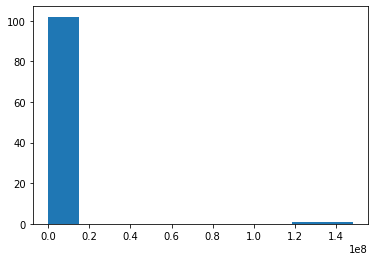

In [20]:
import matplotlib.pyplot as plt
train_var = np.var(X_train, axis=0)
print(train_var)
print("")
print("Max Variance = {} Min Variance = {} Mean Var = {} and train_var shape = {}".format(np.max(train_var), np.min(train_var), np.mean(train_var) ,train_var.shape))
print("")
plt.hist(train_var)

Λόγω μεγάλων χρόνων εκπαίδευσης και lags που αντιμετωπίσαμε κατα την εκτέλεση του gridsearch στο kaggle προσπαθήσαμε να κρατήσουμε τον αριθμό των υπερπαραμέτρων σε ένα διαχειρίσιμο νούμερο. Επίσης, κατά την διάρκεια της βελτιστοποίησης χρησιμοποιήσαμε σχήμα 10-fold cross validation.

In [ ]:
clf_1 = MLPClassifier(verbose=True)
pipe_1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', clf_1)], memory='tmp')

#προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
vthreshold=[0.0001, 0.002]

# η υπερπαράμετρος του ταξινομητή
hl=[(50,), (200,)]
act=['relu', 'logistic']
sol=['adam','sgd', 'lbfgs']
mi=[550]
a=[0.0001, 0.01]
lr=['adaptive']

estimator = GridSearchCV(pipe_1, dict(selector__threshold=vthreshold, mlp__hidden_layer_sizes=hl, mlp__activation=act, mlp__solver=sol, mlp__max_iter=mi, mlp__alpha=a, mlp__learning_rate=lr), cv=10, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))
print("")
print(estimator.best_estimator_)
print("-----------------------")
print(estimator.best_params_)
print("-----------------------")
print("CV score:", np.max(estimator.cv_results_['mean_test_score']))

In [2]:
print(classification_report(y_test, preds))
print("")
print(estimator.best_estimator_)
print("-----------------------")
print(estimator.best_params_)
print("-----------------------")
print("CV score:", np.max(estimator.cv_results_['mean_test_score']))

              precision    recall  f1-score   support















           0       0.75      0.76      0.76      1449







           1       0.78      0.76      0.77      1551















    accuracy                           0.76      3000







   macro avg       0.76      0.76      0.76      3000







weighted avg       0.76      0.76      0.76      3000























Pipeline(memory='tmp',







         steps=[('selector', VarianceThreshold(threshold=0.002)),







                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),







                ('pca', PCA()),







                ('mlp',







                 MLPClassifier(activation='logistic', alpha=0.01,







                               hidden_layer_sizes=(200,),







                               learning_rate='adaptive', max_iter=550,







                               verbose=True))])







-----------------------







{'mlp__activation': 'logistic', 'mlp__al

Παρατηρούμε μια βελτίωση στις μετρικές με αύξηση και στο f1-score για τις δύο κλάσεις του dataset. Στη συνέχεια θα κρατήσουμε το καλύτερο μοντέλο του estimator και θα προσπαθήσουμε να μέσω progressive gridsearch να βελτιώσουμε κι'άλλο την επίδοση του ταξινομητή MLP. 

### Progressive grid search

Δοκιμάζουμε διαφορετικά hidden layers, μεγαλώνουμε το variance threshold και το alpha και επιπλέον δοκιμάζουμε διαφορετικά pca components.

In [6]:
clf_1 = MLPClassifier()
pipe_1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', clf_1)], memory='tmp')

vthreshold=[0.002, 0.009, 0.03]
n_components=[30 ,50, 60]
# η υπερπαράμετρος του ταξινομητή
hl=[(200,), (550,), (700,)]
act=['logistic']
sol=['adam']
mi=[550]
a=[0.01, 0.05]
lr=['adaptive']

estimator = GridSearchCV(pipe_1, dict(selector__threshold=vthreshold, pca__n_components=n_components, mlp__hidden_layer_sizes=hl, mlp__activation=act, mlp__solver=sol, mlp__max_iter=mi, mlp__alpha=a, mlp__learning_rate=lr), cv=10, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))
print("")
print(estimator.best_estimator_)
print("-----------------------")
print(estimator.best_params_)
print("-----------------------")
print("CV score:", np.max(estimator.cv_results_['mean_test_score']))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/l

Συνολικός χρόνος fit και predict: 3501.5970385074615 seconds







              precision    recall  f1-score   support















           0       0.72      0.76      0.74      1449







           1       0.76      0.72      0.74      1551















    accuracy                           0.74      3000







   macro avg       0.74      0.74      0.74      3000







weighted avg       0.74      0.74      0.74      3000























Pipeline(memory='tmp',







         steps=[('selector', VarianceThreshold(threshold=0.009)),







                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),







                ('pca', PCA(n_components=30)),







                ('mlp',







                 MLPClassifier(activation='logistic', alpha=0.05,







                               hidden_layer_sizes=(200,),







                               learning_rate='adaptive', max_iter=550))])







-----------------------







{'mlp__ac

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/l

Σε σύγκριση με το προηγούμενο best estimator παρατηρούμε μια μικρή πτώηση στα f1-score της τάξης του 2%. Πριν προχωρήσουμε στην εφαρμογή του βέλτιστου μοντέλου σε ολόκληρο το dataset θα δοκιμάσουμε ένα τελευταίο pipe χωρίς όμως pca.

In [3]:
clf_1 = MLPClassifier()
pipe_1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('mlp', clf_1)], memory='tmp')

#προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
vthreshold=[0.009]

# η υπερπαράμετρος του ταξινομητή
hl=[(200,)]
act=['logistic']
sol=['adam']
mi=[700]
a=[0.05, 0.1]
lr=['adaptive']

estimator = GridSearchCV(pipe_1, dict(selector__threshold=vthreshold, mlp__hidden_layer_sizes=hl, mlp__activation=act, mlp__solver=sol, mlp__max_iter=mi, mlp__alpha=a, mlp__learning_rate=lr), cv=10, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))
print("")
print(estimator.best_estimator_)
print("-----------------------")
print(estimator.best_params_)
print("-----------------------")
print("CV score:", np.max(estimator.cv_results_['mean_test_score']))

Συνολικός χρόνος fit και predict: 342.6060688495636 seconds







              precision    recall  f1-score   support















           0       0.74      0.72      0.73      1449







           1       0.74      0.76      0.75      1551















    accuracy                           0.74      3000







   macro avg       0.74      0.74      0.74      3000







weighted avg       0.74      0.74      0.74      3000























Pipeline(memory='tmp',







         steps=[('selector', VarianceThreshold(threshold=0.009)),







                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),







                ('mlp',







                 MLPClassifier(activation='logistic', alpha=0.1,







                               hidden_layer_sizes=(200,),







                               learning_rate='adaptive', max_iter=700))])







-----------------------







{'mlp__activation': 'logistic', 'mlp__alpha': 0.1, 'mlp__hidden_l

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/l

Δεν παρατηρήσαμε κάοποια βελτίωση στo f1-score του μοντέλου όμως είχαμε μία μικρή μείωση στο mean score του cross validation.

**Θα πάρουμε τώρα το καλύτερο μοντέλο με βάση τις μετρικές και θα το εκπαιδεύσουμε στο σύνολο των δεδομένων.**

In [4]:
selector = VarianceThreshold(0.002)
scaler = StandardScaler()
pca = PCA()
clf_1 = MLPClassifier(hidden_layer_sizes=(200,), solver="adam", activation="logistic", max_iter=700, learning_rate="adaptive", alpha=0.01)

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca),('mlp', clf_1)])

start_time=time.time()
pipe.fit(train,train_labels)
preds = pipe.predict(test)
print("Συνολικός χρόνος fit και predict: {:.3f} seconds".format((time.time() - start_time)))
print(classification_report(test_labels, preds))

Συνολικός χρόνος fit και predict: 501.013 seconds







              precision    recall  f1-score   support















           0       0.83      0.83      0.83     18128







           1       0.83      0.84      0.84     18595















    accuracy                           0.83     36723







   macro avg       0.83      0.83      0.83     36723







weighted avg       0.83      0.83      0.83     36723










Παρατηρούμε πώς η εφαρμογλη των υπερπαραμέτρων που βρήκαμε μέσω της διαδικασίας του gridsearch, σε ολόκληρο το dataset μας απέδωσε 83% ακρίβεια σε όλες της μετρικές. Σαφώς καλύτερο από το αρχικό ποσοστό του 73% στο out of the box.

## SVM

**Δημιουργία Pipeline**

In [21]:
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
svm = SVC()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler),('pca', pca), ('svm', svm)])

start_time=time.time()
pipe.fit(train,train_labels)
preds = pipe.predict(test)
print("Συνολικός χρόνος fit και predict: {:.3f} seconds".format((time.time() - start_time)))
print(classification_report(test_labels, preds))

Συνολικός χρόνος fit και predict: 1039.792 seconds



              precision    recall  f1-score   support







           0       0.76      0.84      0.80     18093



           1       0.83      0.75      0.79     18630







    accuracy                           0.79     36723



   macro avg       0.79      0.79      0.79     36723



weighted avg       0.80      0.79      0.79     36723






Επαναλαμβάνουμε την διαδικασία αλλά αυτή την φορά με το μειωμένο dataset των 10000 δειγμάτων.

In [22]:
start_time=time.time()
pipe.fit(X_train,y_train)
preds = pipe.predict(X_test)
print("Συνολικός χρόνος fit και predict: {:.3f} seconds".format((time.time() - start_time)))
print(classification_report(y_test, preds))

Συνολικός χρόνος fit και predict: 4.876 seconds



              precision    recall  f1-score   support







           0       0.73      0.79      0.76      1449



           1       0.79      0.73      0.76      1551







    accuracy                           0.76      3000



   macro avg       0.76      0.76      0.76      3000



weighted avg       0.76      0.76      0.76      3000






**Gridsearch**

In [26]:
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()
pca = PCA()
svm = SVC()

vthreshold=[0.0001, 0.002]
kernel = ['linear', 'poly', 'rbf']
C = [0.001, 0.01]
gamma = [0.001, 0.01]
#degree = [1, 3]

pipe = Pipeline(steps=[('selector', selector),('scaler', scaler),('pca', pca), ('svm', svm)], memory='tmp')

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, svm__kernel=kernel, svm__gamma=gamma, svm__C=C), cv=10, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))
print("")
print(estimator.best_estimator_)
print("-----------------------")
print(estimator.best_params_)
print("-----------------------")
print("CV score:", np.max(estimator.cv_results_['mean_test_score']))

Συνολικός χρόνος fit και predict: 628.1438224315643 seconds



              precision    recall  f1-score   support







           0       0.72      0.76      0.74      1449



           1       0.77      0.73      0.75      1551







    accuracy                           0.74      3000



   macro avg       0.74      0.75      0.74      3000



weighted avg       0.75      0.74      0.74      3000











Pipeline(memory='tmp',



         steps=[('selector', VarianceThreshold(threshold=0.0001)),



                ('scaler', StandardScaler()), ('pca', PCA()),



                ('svm', SVC(C=0.01, gamma=0.001, kernel='linear'))])



-----------------------



{'selector__threshold': 0.0001, 'svm__C': 0.01, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}



-----------------------



CV score: 0.7500537579670439


**Διαδοχικό Grid Search στο οποίο επιλέγουμε τιμές γύρω από τις παραμέτρους που βρήκαμε από πάνω:**

In [ ]:
vthreshold=[0.0001]
kernel = ['linear']
C = [0.005, 0.01,0.1,1]
gamma = [0.0005,0.001, 0.005,0.1]
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, svm__kernel=kernel, svm__gamma=gamma, svm__C=C), cv=10, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))
print("")
print(estimator.best_estimator_)
print("-----------------------")
print(estimator.best_params_)
print("-----------------------")
print("CV score:", np.max(estimator.cv_results_['mean_test_score']))

Η έξοδος η οποία είχαμε ήταν:

Συνολικός χρόνος fit και predict: 435.21312069892883 seconds

              **precision**    recall  **f1-score**   support

           0       0.72      0.77      0.74      1449
           1       0.77      0.72      0.74      1551

    accuracy                           0.74      3000
   macro avg       **0.74**      0.74      **0.74**      3000
weighted avg       0.74      0.74      0.74      3000


Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0001)),
                ('scaler', StandardScaler()), ('pca', PCA()),
                ('svm', SVC(C=0.005, gamma=0.0005, kernel='linear'))])

**{'selector__threshold': 0.0001, 'svm__C': 0.005, 'svm__gamma': 0.0005, 'svm__kernel': 'linear'}**

CV score: **0.7512937394802203**

**Θα πάρουμε τώρα το καλύτερο μοντέλο με βάση τις μετρικές και θα το εκπαιδεύσουμε στο σύνολο των δεδομένων.**

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import time

pca = PCA()
svm = SVC()
selector = VarianceThreshold(0.0001)
scaler = StandardScaler()
svm = SVC(C=0.005, kernel='linear', gamma=0.0005, verbose=False)
pipe = Pipeline(steps=[('selector', selector),('scaler', scaler),('pca', pca), ('svm', svm)], memory='tmp')

In [45]:
start_time=time.time()
pipe.fit(X_train,y_train)
preds = pipe.predict(X_test)
print("Συνολικός χρόνος fit και predict: {:.3f} seconds".format((time.time() - start_time)))
print(classification_report(y_test, preds))

Συνολικός χρόνος fit και predict: 3.903 seconds



              precision    recall  f1-score   support







           0       0.72      0.77      0.74      1449



           1       0.77      0.72      0.74      1551







    accuracy                           0.74      3000



   macro avg       0.74      0.74      0.74      3000



weighted avg       0.74      0.74      0.74      3000






In [16]:
start_time=time.time()
pipe.fit(train,train_labels)
preds = pipe.predict(test)
print("Συνολικός χρόνος fit και predict: {:.3f} seconds".format((time.time() - start_time)))
print(classification_report(test_labels, preds))

Συνολικός χρόνος fit και predict: 791.484 seconds

              precision    recall  f1-score   support



           0       0.73      0.80      0.76     17961

           1       0.79      0.71      0.75     18762



    accuracy                           0.75     36723

   macro avg       0.76      0.76      0.75     36723

weighted avg       0.76      0.75      0.75     36723




# Βελτιστοποίηση υπερπαραμέτρων με χρήση βιβλιοθήκης βελτιστοποίησης Optuna.

## Εγκατάσταση optuna

In [18]:
!pip install optuna

## MLP

In [2]:
import optuna
import sklearn.neural_network

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 3)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 200, 300))
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, target, test_size=0.30)
    
    lr=trial.suggest_categorical('learning_rate', ["constant", "adaptive"])
    sol=trial.suggest_categorical("optimizer", ["adam", "sgd"])
    act=trial.suggest_categorical("activation", ["relu", "tanh"])
    mi=trial.suggest_int("max_iter", 500, 700)
    
    ros = RandomOverSampler(random_state=32)
    X_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

    clf_1 = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=tuple(layers), learning_rate=lr, solver=sol,activation=act, max_iter=mi)
    clf_1.fit(X_train_resampled, y_train_resampled)

    return clf_1.score(x_test, y_test)

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=30)

print("")
print("Best Trial is: ")
best_trial = study.best_trial
for key, value in best_trial.params.items():
    print("{}: {}".format(key, value))

[I 2022-11-28 15:48:45,701] A new study created in memory with name: no-name-07fceb81-4470-4efc-a34d-827dae87e346







[I 2022-11-28 15:48:48,792] Trial 0 finished with value: 0.49766666666666665 and parameters: {'n_layers': 1, 'n_units_0': 264, 'learning_rate': 'constant', 'optimizer': 'sgd', 'activation': 'relu', 'max_iter': 629}. Best is trial 0 with value: 0.49766666666666665.







[I 2022-11-28 15:48:58,916] Trial 1 finished with value: 0.6673333333333333 and parameters: {'n_layers': 2, 'n_units_0': 248, 'n_units_1': 212, 'learning_rate': 'constant', 'optimizer': 'adam', 'activation': 'tanh', 'max_iter': 599}. Best is trial 1 with value: 0.6673333333333333.







[I 2022-11-28 15:49:01,112] Trial 2 finished with value: 0.6856666666666666 and parameters: {'n_layers': 1, 'n_units_0': 270, 'learning_rate': 'adaptive', 'optimizer': 'adam', 'activation': 'relu', 'max_iter': 539}. Best is trial 2 with value: 0.6856666666666666.







[I 2022-11-28 15:49:07,060] Trial 3 finished wi









Best Trial is: 







n_layers: 1







n_units_0: 236







learning_rate: adaptive







optimizer: adam







activation: tanh







max_iter: 504


**Εφαρμόζουμε τον βέλτιστο ταξινομητή που βρήκαμε με την χρήση της βιβλιοθήκης optuna σε ολόκληρο το dataset.**

In [4]:
selector = VarianceThreshold(0.0001)
scaler = StandardScaler()
clf_1 = MLPClassifier(hidden_layer_sizes=(236,), solver="adam", activation="tanh", max_iter=504, learning_rate="adaptive")

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('mlp', clf_1)])

start_time=time.time()
pipe.fit(train,train_labels)
preds = pipe.predict(test)
print("Συνολικός χρόνος fit και predict: {:.3f} seconds".format((time.time() - start_time)))
print(classification_report(test_labels, preds))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.







  ConvergenceWarning,







/opt/conda/l

Συνολικός χρόνος fit και predict: 1022.865 seconds







              precision    recall  f1-score   support















           0       0.84      0.83      0.83     18128







           1       0.83      0.85      0.84     18595















    accuracy                           0.84     36723







   macro avg       0.84      0.84      0.84     36723







weighted avg       0.84      0.84      0.84     36723










Με χρήση της βιβλιοθήκης optuna πετύχαμε μια ελαφρώς καλύτερο επίδοση σε σχέση με το μοντέλο που βρήκαμε μέσω της διαδικασίας του gridsearch.

## SVM

Συνεχίζουμε τη βελτιστοποίηση του μοντέλου από τις βέλτιστες παραμέτρους που προέκυψαν από τα 2 διαδοχικά Grid Search στο προηγούμενο βήμα αυτή τη φορά χρησιμοποιώντας Optuna:

*Λόγω των μεγάλων χρονων εκπαίδευσης με την βιβλιοθήκη βελτιστοποίησης optuna θα δουλέψουμε με ένα υποσύνολο 1000 δειγμάτων του αρχικού dataset με split 70-30 και στην συνέχεια θα εφαρμόσουμε το βέλτιστο μοντέλο σε ολόκληρο το σύνολο δεδομένων**

In [19]:
from sklearn.utils import shuffle
sdata_2, starget_2 = shuffle(features, labels, random_state=42)
samples = 1000
data_2 = sdata[0:samples-1,:]
target_2 = starget[0:samples-1]

In [ ]:
import optuna
import sklearn.neural_network
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def objective(trial):

    # Load data
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data_2, target_2, test_size=0.30)
    
    #kernel = ['linear']
    kernel = trial.suggest_categorical('kernel',['poly','rbf'])
    C = trial.suggest_float('C', 0.0001, 1.0, log=True)
    gamma = trial.suggest_categorical('gamma', ['auto'])
    degree=trial.suggest_int("degree",1,3,log=True)

    clf =  sklearn.svm.SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
    
    clf.fit(x_train, y_train)
    return clf.score(x_test, y_test)
     

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=20, n_jobs=-1)

In [30]:
print("")
print("Best Trial is: ")
best_trial = study.best_trial
for key, value in best_trial.params.items():
    print("{}: {}".format(key, value))



Best Trial is: 

kernel: poly

C: 0.005320004781847882

gamma: auto

degree: 1


**Εφαρμόζουμε τον βέλτιστο ταξινομητή που βρήκαμε με την χρήση της βιβλιοθήκης optuna σε ολόκληρο το dataset.**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import time

svm = SVC()
scaler = StandardScaler()
pca = PCA()
selector = VarianceThreshold(0.0001)
scaler = StandardScaler()
svm = SVC(C=0.005, kernel='poly', gamma='auto', degree=1, verbose=False)
pipe = Pipeline(steps=[('selector', selector),('scaler', scaler),('pca', pca), ('svm', svm)], memory='tmp')

start_time=time.time()
pipe.fit(train,train_labels)
preds = pipe.predict(test)
print("Συνολικός χρόνος fit και predict: {:.3f} seconds".format((time.time() - start_time)))
print(classification_report(test_labels, preds))

*Η εκτέλεση του παραπάνω μοντέλου έγινε σε προηγούμενο session και λόγω της διάρκειάς της και του ότι δεν παρήγαγε καλύτερα αποτελέσματα από τα διαδοχικά Grid Search την παραλείπουμε**

# Τεκμιρίωση διαδικασίας.

**MLP**

Συνοπτικά η διαδικασία που ακολοθουθήσαμε, και έχει περιγραφεί παραπάπάνω, για να καταλήξουμε στην καλύτερη υλοποίηση του μοντέλου mlp είναι η εξής. 
* Ορισμός ενός pipeline με standart scaler (ώστε να βοηθήσει στην εκπαίδευση του mlp), variance threshold και pca στις default τιμές τους και εφαρμογή στο dataset.
* Ορισμός ενός νέου μικρότερου dataset με 10000 δείγματα λόγω των απαγορευτηκά μεγάλων χρόνων βελτιστοποίησης που συναντήσαμε με ολόκληρο το dataset.
* Gridsearch με δοκιμή διαφορετικών υπερπαραμέτρων.
* Επιλογή του καλύτερου estimator και εφαρμογή progressive gridsearch σε αυτό το μοντέλο με δοκιμή διαφορετικών variance thresholds και pca components.
* Fit του καλύτερου μοντέλου που προέκυψε από το gridsearch σε ολόκληρο το training set και predict στο test set.
* Αξιοποίηση της βιβλιοθήκης βελτιστοποίησης υπερπαραμέτρων optuna.
* Fit του καλύτερου μοντέλου που προέκυψε σε ολόκληρο το training set και predict στο test set.
* Σύγκριση των δύο μοντέλων (από optuna και gridsearch) με βάση τις μετρικές και επιλογή του καλύτερου.

**SVM**

* Αρχικά, δοκιμάζουμε τον ταξινομητή σε όλο το dataset παράγοντας τα out of the box αποτελέσματα.
* Στη συνέχεια, για τις ανάγκες της βελτιστοποίησης και επειδή ο ταξινόμητης Support Vector Machine έχει μεγάλη υπολογιστική πολυπλοκότητα (~ Ο(Ν3)) και μετά από διάφορες δοκιμές αποφασίζουμε να μειώσουμε το dataset στα 10000 δείγματα.
* Ομοίως με την εκπαίδευση του μοντέλου MLP ορίζουμε ένα pipeline με standart scaler, variance threshold και pca στις default τιμές τους και το δοκιμάζουμε σε όλο το dataset και έπειτα στο μειωμένο και συγκρίνουμε τους χρόνους, ώστε να έχουμε και μια πρόβλεψη για τον χρόνο εκτέλεσης του Grid Search.
* Στο πρώτο Grid Search που εκτελούμε δοκιμάζουμε τιμές και για τα 3 διαφορετικά είδη kernel.
* Για το δεύτερο έχουμε επιλέξει ως βέλτιστο kernel το linear το οποίο προέκυψε ως καλύτερο στο προηγούμενο βήμα και συνεχίζουμε την αναζήτησ παραμέτρων γύρω από τις βέλτιστες παραμέτρους του προηγούμενου βήματος.
* Με τις παραμέτρους που προέκυψαν ξαναδοκιμάζουμε την επίδοση του μοντέλου σε ολόκληρο το dataset και καταγράφουμε την βελτίωσή του.
* Αξιοποίηση της βιβλιοθήκης βελτιστοποίησης υπερπαραμέτρων optuna.
* Fit του καλύτερου μοντέλου που προέκυψε σε ολόκληρο το training set και predict στο test set.
* Σύγκριση των δύο μοντέλων (από optuna και gridsearch) με βάση τις μετρικές και επιλογή του καλύτερου.

# Παρουσίαση αποτελεσμάτων.

Εποπτικά έχουμε:

|          | Dummy | SMV  | SMV_OPT | MLP  | MLP_OPT |
|----------|-------|------|---------|------|---------|
| Accuracy | 0.51  | 0.72 | 0.75    | 0.73 | 0.84    |
| F1-macro | 0.34  | 0.72 | 0.75    | 0.73 | 0.84    |

όπου OPT είναι μετρικές για τα καλύτερα μοντέλα που προέκυψαν στη βελτιστοποίηση είτε από τα Grid Search είτε από τη βιβλιοθήκη optuna.

- *Ο dummy ταξινομητής χρησιμοποιήθηκε μόνο ως baseline και για αυτό δεν βελτιστοποιήθηκε. Στο παρακάτω σχήμα αφήνουμε ως optimized τιμή την ίδια*
- *Τα f1 scores και accuracies είναι ίδια λόγω του ότι το dataset μας είναι ζυγισμένο*

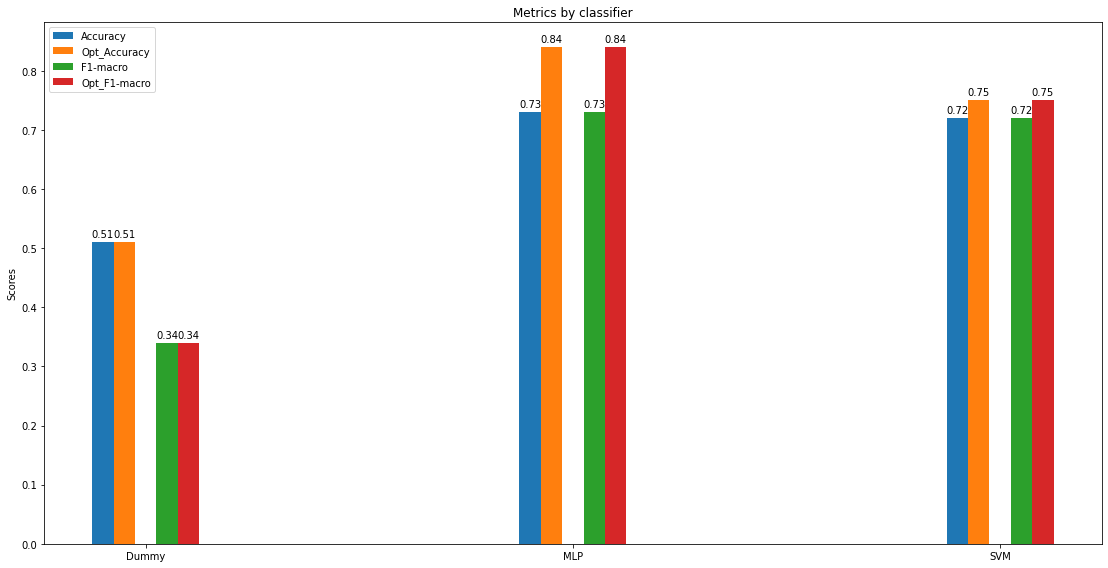

In [4]:
import matplotlib.pyplot as plt
labels = ['Dummy','MLP','SVM']

acc = [0.51,0.73,0.72]
f1 = [0.34,0.73,0.72]

x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars

acc2 = [0.51,0.84,0.75]
f12 = [0.34,0.84,0.75]
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8)
rects1 = ax.bar(x - 2*width, acc, width, label='Accuracy')
rects12 = ax.bar(x - width, acc2, width, label='Opt_Accuracy')
rects2 = ax.bar(x + width, f1, width, label='F1-macro')
rects22 = ax.bar(x + 2*width, f12, width, label='Opt_F1-macro')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Metrics by classifier')
plt.xticks(x, labels)
ax.legend(loc='upper left')
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects12, padding=3)
ax.bar_label(rects22, padding=3)
fig.tight_layout()
plt.show()

**Συμπερασματικά, καταλήγουμε στο μοντέλο MLP αφού είχε καλύτερα αποτελέσματα στο συνολικό test set και αφού προηγήθηκε η βελτιστοποίηση και των δύο υποψήφιων μοντέλων.**